<a href="https://colab.research.google.com/github/Fahari04/My_Inventory/blob/main/ai_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  
(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol     

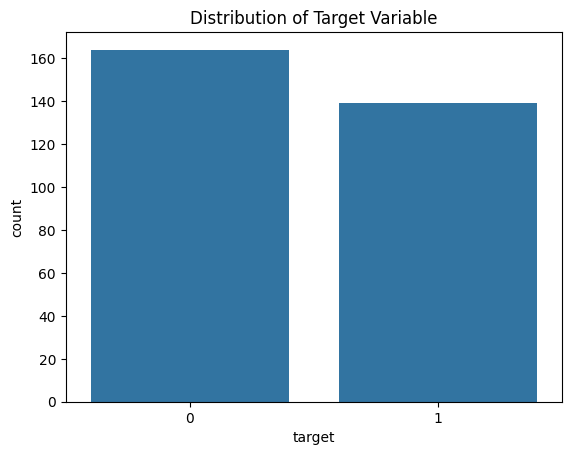

Training set size: (266, 8)
Testing set size: (37, 8)


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
    "exang", "oldpeak", "slope", "ca", "thal", "target"
]
df = pd.read_csv(url, names=columns)

# Examine the dataset
print(df.head())
print(df.shape)
print(df.info())
print(df.describe())

# Replace missing values indicated by '?' with NaN
df.replace('?', np.nan, inplace=True)

# Convert columns to numeric
df = df.apply(pd.to_numeric)

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
df.iloc[:, :] = imputer.fit_transform(df)

# Remove categorical features
df.drop(columns=['cp', 'restecg', 'slope', 'ca', 'thal'], inplace=True)

# Convert target variable to binary (1 for presence of heart disease, 0 for absence)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Visualize the distribution of the target variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

# Split the dataset into training and testing sets
test_size = 12 / 100  # 12% test set size
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize the models
dt_classifier = DecisionTreeClassifier(random_state=42)
knn_classifier = KNeighborsClassifier()

# Train the models
dt_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict and evaluate the Decision Tree classifier
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Predict and evaluate the KNN classifier
y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print the evaluation metrics
print(f"Decision Tree Classifier:\nAccuracy: {accuracy_dt}\nPrecision: {precision_dt}\nRecall: {recall_dt}\nF1 Score: {f1_dt}")
print(f"K-Nearest Neighbors Classifier:\nAccuracy: {accuracy_knn}\nPrecision: {precision_knn}\nRecall: {recall_knn}\nF1 Score: {f1_knn}")


Decision Tree Classifier:
Accuracy: 0.5675675675675675
Precision: 0.6470588235294118
Recall: 0.5238095238095238
F1 Score: 0.5789473684210527
K-Nearest Neighbors Classifier:
Accuracy: 0.5945945945945946
Precision: 0.7142857142857143
Recall: 0.47619047619047616
F1 Score: 0.5714285714285714


In [4]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for tuning
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize and train the Decision Tree classifier with GridSearchCV
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='f1')
dt_grid.fit(X_train, y_train)

# Best parameters and model evaluation
best_dt = dt_grid.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)
f1_best_dt = f1_score(y_test, y_pred_best_dt)
print(f"Best Decision Tree F1 Score: {f1_best_dt} with parameters: {dt_grid.best_params_}")


Best Decision Tree F1 Score: 0.5500000000000002 with parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [5]:
# Define hyperparameters for tuning
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize and train the KNN classifier with GridSearchCV
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='f1')
knn_grid.fit(X_train, y_train)

# Best parameters and model evaluation
best_knn = knn_grid.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)
f1_best_knn = f1_score(y_test, y_pred_best_knn)
print(f"Best KNN F1 Score: {f1_best_knn} with parameters: {knn_grid.best_params_}")


Best KNN F1 Score: 0.5714285714285714 with parameters: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
